# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the three datasets:

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import EfficientCapsNet

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


c:\Users\Tautvydas\Documents\magistras\master_capsnet\venv\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0-rc2 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
# some parameters
model_name = 'MNIST' 
custom_path = None # if you've trained a new model, insert here the full graph weights path

# 1.0 Import the Dataset

In [4]:
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

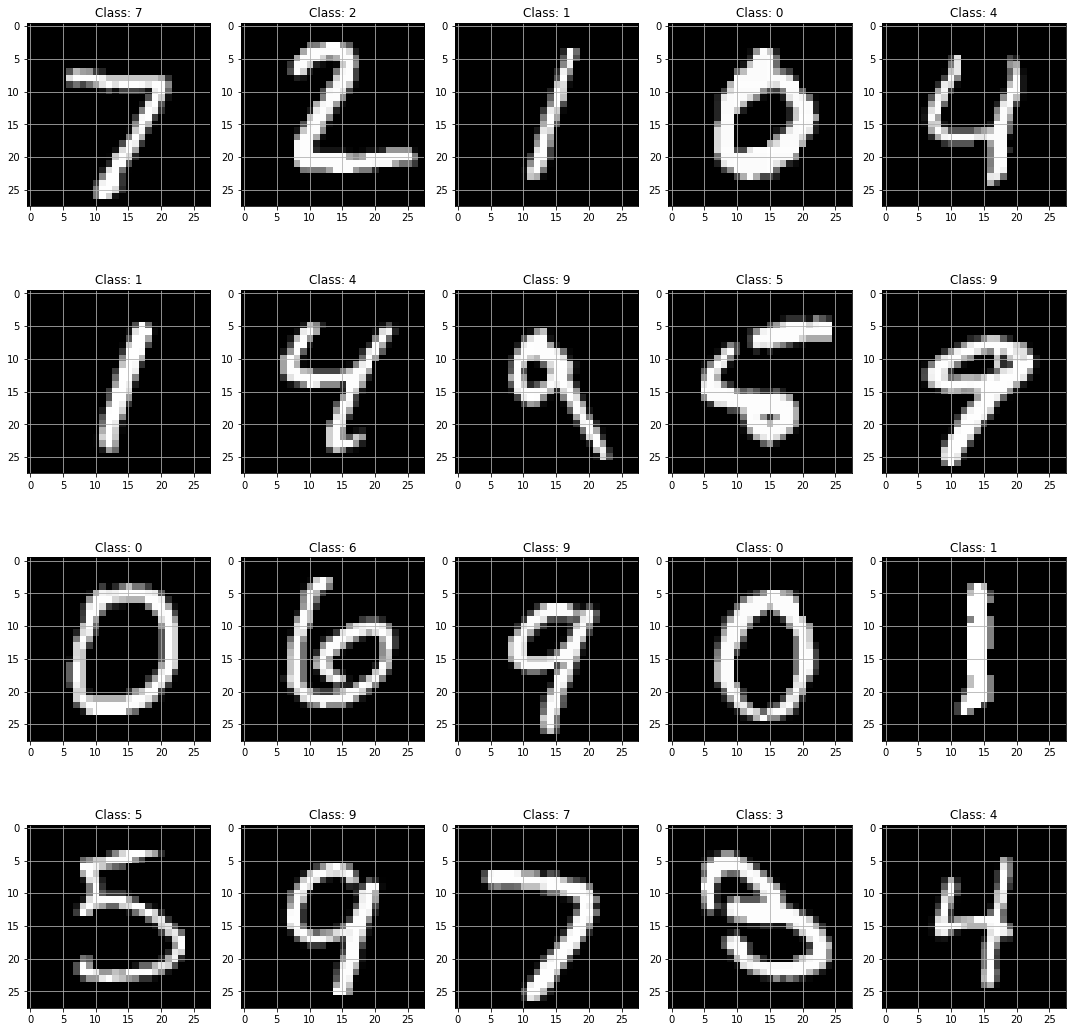

In [5]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [6]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)  

# 3.0 Test the Model

In [7]:
model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------MNIST Evaluation------------------------------
Test acc: 0.9978
Test error [%]: 0.2200%
N° misclassified images: 21 out of 10000


## 3.1 Plot misclassified images

In [ ]:
#not working with MultiMNIST
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)